# Health Insurance Premium Estimate

Bu projede kişiye ait bilgilere bakılarak sağlık sigortası maliyeti tahmin edilmeye çalışılacaktır.
<br>Projede kullanılan veriler <a href="https://thecleverprogrammer.com/2021/10/26/health-insurance-premium-prediction-with-machine-learning/" target="_blank"> buradan</a> temin edilmiştir.
<br><br>Veri setinde aşağıdaki bilgiler bulunmaktadır:
* Kişinin yaşı
* Kişinin cinsiyeti
* Kişinin Beden Kitle İndeksi
* Kişinin çocuk sayısı
* Kişinin sigara içip içmediği
* Kişinin yaşadığı bölge
* Sigorta primi tutarı

<b>Amaç:</b> Tablo verileri kullanılarak sigorta pirim tutarını tahmin edecek Regression modeli geliştirmekmiştir.irmekmiştir.belirtilmiştir.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("Health_insurance.csv")

## Keşfedici Veri Analizi (EDA)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Kategori alanlarını sayıya çevilerim

In [5]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df["sex"]=np.where(df['sex'] == 'male', 1, 0)

In [7]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [8]:
df["smoker"]=np.where(df['smoker'] == 'yes', 1, 0)

In [9]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
d={"southeast":1, "southwest":2, "northeast":3, "northwest":4}
df["region"]=df["region"].map(d)

### Alanlar arasındaki korelasyona bakalım

In [11]:
df.corr(numeric_only=True)

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.005212,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.016121,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.261829,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.019257,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.053930,0.787251
region,0.005212,-0.016121,-0.261829,0.019257,-0.053930,1.000000,-0.056993
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.056993,1.000000


<Axes: >

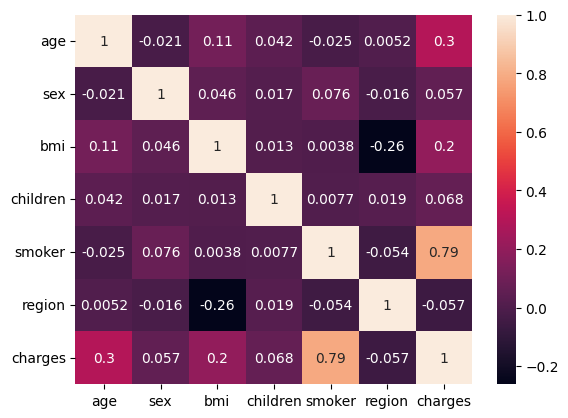

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Hedef alan ile en çok ilişkili olan alanın smoker (%79) olduğu görülüyor.

In [13]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


## Modelleme

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
                
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
                 
        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
x=df.drop("charges", axis=1)
y=df[["charges"]]

In [17]:
x.shape, y.shape

((1338, 6), (1338, 1))

In [18]:
algo_test(x,y)

C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,R_Squared,RMSE,MAE
Gradient Boosting,0.879791,4319.983527,2403.750175
XGBRegressor,0.844582,4912.078031,2719.986047
Linear,0.783022,5803.931715,4190.220190
Lasso,0.782990,5804.350787,4191.065718
Ridge,0.782733,5807.790367,4202.909202
Extra Tree,0.710506,6703.992398,3017.908591
Decision Tree,0.702908,6791.398984,3317.137598
ElasticNet,0.417623,9508.588585,7428.182320
KNeighborsRegressor,0.114095,11727.560636,8103.265148


### Feature Importance

In [19]:
lr=LinearRegression()

In [20]:
lr=LinearRegression()

In [21]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [22]:
model=lr.fit(x_train, y_train)

In [23]:
tahmin = model.predict(x_test)

In [24]:
r2_score(y_test, tahmin)

0.7830215871623442

In [25]:
mean_squared_error(y_test, tahmin) ** .5

5803.931715151757

In [26]:
feature_importance=pd.DataFrame({"Feature":x_train.columns, "Coefs": lr.coef_[0]})
feature_importance=feature_importance.sort_values(by="Coefs", ascending=False)
feature_importance

,Feature,Coefs
4,smoker,23672.498207
3,children,422.627296
2,bmi,335.095743
0,age,256.625541
5,region,165.804576
1,sex,-17.134753


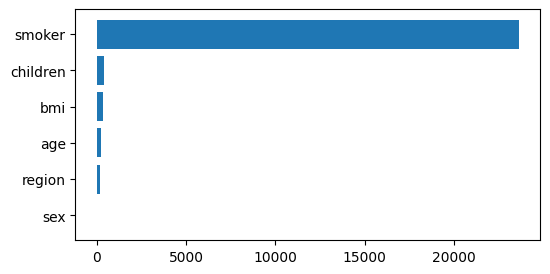

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.barh(feature_importance["Feature"], feature_importance["Coefs"]);
plt.gca().invert_yaxis()

In [28]:
residuals=y_test-tahmin
residuals

,charges
764,497.783355
887,-1959.568082
890,-7708.248940
1293,-314.318579
259,6589.136753
...,...
109,8038.013462
575,300.415378
535,-1249.040175
543,22917.024939


<Axes: ylabel='Count'>

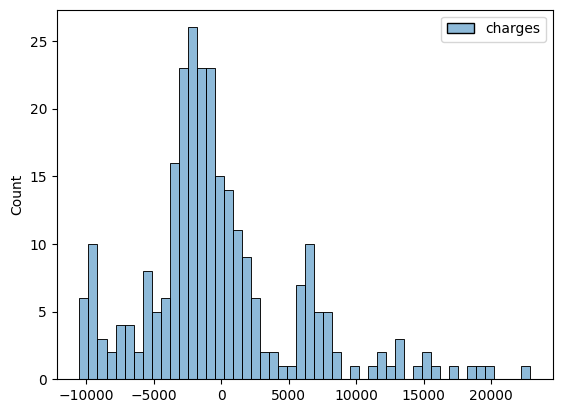

In [29]:
sns.histplot(residuals, bins=50)

<Axes: xlabel='charges', ylabel='Density'>

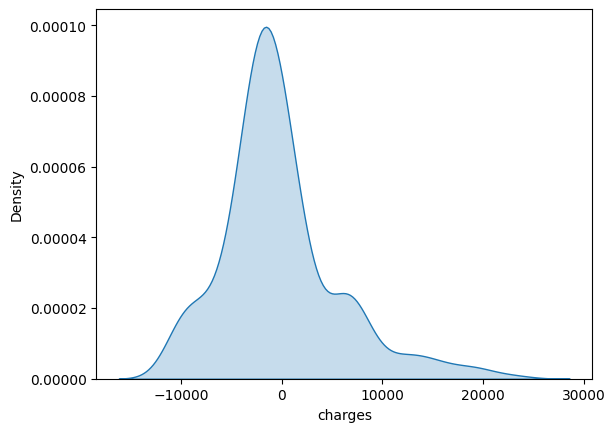

In [30]:
sns.kdeplot(x=residuals["charges"], fill=True)

# Sonuç
Bu projede bir kişiye ait bilgiler kullanılarak o kişinin sağlık sigortası için gereken pirim maliyeti tahmin edilmeye çalışıldı. Geliştirilen Regression modellerinde en yüksek başarı oranı yaklaşık %88 ile Gradient Boosting modelinde elde edildi.<br>
Bu modeli yeniden eğiterek kaydedip Streamlit uygulaması için kullanalım.

In [31]:
gr=GradientBoostingRegressor()

In [32]:
model=gr.fit(x,y)

C:\Users\Abdullatif\miniconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [33]:
import pickle
pickle.dump(model, open('health_insurance.pkl', 'wb'))

Hazırlanan uygulama <a href="https://huggingface.co/spaces/abdullatifkaban/Sigorta_Pirim_Tahmini" target=_blank>
<u>Hugging Face</u></a> üzerinden yayımlanmıştır.